In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2026-02-02 15:27:31.682982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the MNIST dataset from Keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Training samples: ", len(X_train))
print("Test samples: ", len(X_test))


print("Shape of individual images: ", X_train[0].shape)


Training samples:  60000
Test samples:  10000
Shape of individual images:  (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

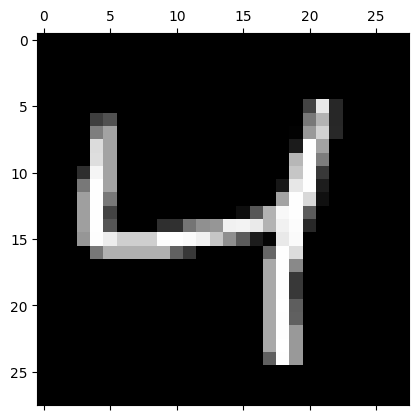

In [5]:
plt.matshow(X_train[2], cmap='gray')

In [6]:
y_train[2]

4

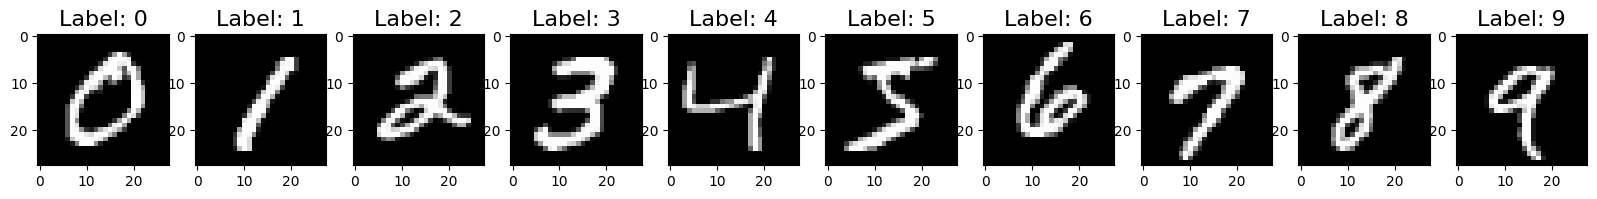

In [7]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [8]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the pixel values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural network can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [12]:
print(X_train.shape) # 28 * 28
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28X28 pixels in each image) and the outputlayer will have 10 neurons as we want to predict a digit, 0-9

In [13]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape = (784,), activation='softmax')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.4711 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 1s 785us/step - loss: 0.3045 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 703us/step - loss: 0.2840 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 715us/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 683us/step - loss: 0.2668 - accuracy: 0.9255


In [14]:
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 0s 671us/step - loss: 0.2715 - accuracy: 0.9245
Test Loss: 0.2714884877204895
Test Accuracy: 0.9244999885559082


1. Prediction Generation:
    * How can you generate predictions from a trained neural network model using a test dataset? What function or method would you use?

In [15]:
predictions = model.predict(X_test_flattened)

print("Predictions shape:", predictions.shape)
print("Prediction probabilities for first test image:\n", predictions[0])


313/313 [==============================] - 0s 586us/step
Predictions shape: (10000, 10)
Prediction probabilities for first test image:
 [2.4741685e-06 5.4409897e-11 9.4953712e-06 2.1570378e-03 3.9045125e-07
 1.7854389e-05 1.0626011e-10 9.9758887e-01 7.7255299e-06 2.1615467e-04]


2. Accessing Prediction Details:
    * How would you access the prediction details for the second image in the test dataset? Which index would you use to retrieve this information from the predictions array?

In [16]:
second_prediction = predictions[1]

print("Prediction probabilities for the second image:")
print(second_prediction)

Prediction probabilities for the second image:
[2.6448115e-04 3.0588469e-06 9.9494684e-01 1.7968559e-04 3.1858923e-13
 1.9414346e-03 2.6011060e-03 7.7595391e-16 6.3410618e-05 1.2728180e-12]


3. Finding the Predicted Class:
    * How can you determine the predicted class from the output of a neural network? What function would you use to find the index of the highest probability?

In [17]:
predicted_class = np.argmax(second_prediction)

print("Predicted class for the second image:", predicted_class)


Predicted class for the second image: 2


4. Visualizing Test Data:
    * Which function would you use to visualize a specific test image, and what parameters might you need to provide to display it in grayscale?

(-0.5, 27.5, 27.5, -0.5)

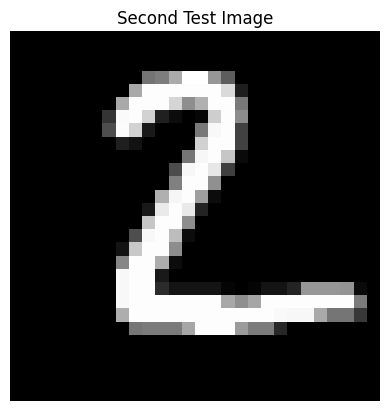

In [18]:
plt.imshow(X_test[1], cmap='gray')
plt.title("Second Test Image")
plt.axis('off')


5. Comparing with Actual Labels:
    * How would you retrieve the actual label for the second image in the test dataset? Which index should you use to access this information?

In [19]:
actual_label = y_test[1]

print("Actual label for the second image:", actual_label)


Actual label for the second image: 2


6. Converting Predictions to Class Labels:
    * How can you convert a list of prediction probabilities into class labels for each test image? What Python technique or method would help you iterate over the predictions and extract the labels?

In [20]:
predicted_labels = np.argmax(predictions, axis=1)

print("Converted predicted labels (first 10):")
print(predicted_labels[:10])


Converted predicted labels (first 10):
[7 2 1 0 4 1 4 9 6 9]


7. Examining Initial Predictions:
    * How would you access the first five predicted class labels from your converted predictions? Which part of the list would you slice to get this subset?

In [21]:
print("First five predicted class labels:")
print(predicted_labels[:5])

First five predicted class labels:
[7 2 1 0 4]


In [22]:
model_hl = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_hl.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_hl.fit(
    X_train_flattened,
    y_train,
    epochs=5
)



Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2585 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1135 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9859


In [23]:
test_loss_hl, test_accuracy_hl = model_hl.evaluate(X_test_flattened, y_test)

print("Test Loss:", test_loss_hl)
print("Test Accuracy:", test_accuracy_hl)


313/313 [==============================] - 0s 835us/step - loss: 0.0805 - accuracy: 0.9750
Test Loss: 0.08052004128694534
Test Accuracy: 0.9750000238418579


In [24]:
predictions_hl = model_hl.predict(X_test_flattened)

print("Predictions shape:", predictions_hl.shape)
print("Prediction probabilities for first test image:\n", predictions_hl[0])


313/313 [==============================] - 0s 683us/step
Predictions shape: (10000, 10)
Prediction probabilities for first test image:
 [2.6839453e-07 2.3683542e-09 4.7890981e-06 5.3538667e-04 1.1646684e-09
 1.0944836e-07 1.8303740e-12 9.9943936e-01 1.0196184e-07 2.0004518e-05]


In [25]:
predicted_labels_hl = np.argmax(predictions_hl, axis=1)

print("First 10 predicted labels:")
print(predicted_labels_hl[:10])


First 10 predicted labels:
[7 2 1 0 4 1 4 9 5 9]


(-0.5, 27.5, 27.5, -0.5)

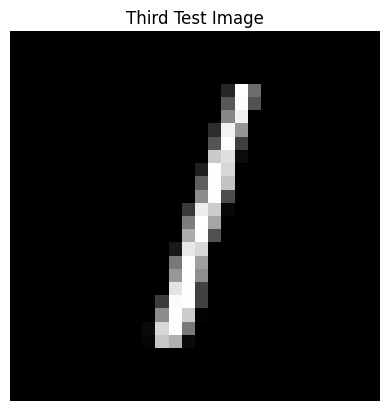

In [26]:
plt.imshow(X_test[2], cmap='gray')
plt.title("Third Test Image")
plt.axis('off')


In [27]:
actual_label1 = y_test[2]

print("Actual label for the third image:", actual_label1)

Actual label for the third image: 1


In [28]:
print("Without hidden layer model accuracy:", test_accuracy)
print("Hidden layer model accuracy:", test_accuracy_hl)



Without hidden layer model accuracy: 0.9244999885559082
Hidden layer model accuracy: 0.9750000238418579


In [29]:
model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(
    X_train_flattened,
    y_train,
    epochs=10,
    validation_split=0.1
)


Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3121 - accuracy: 0.9080 - val_loss: 0.1274 - val_accuracy: 0.9665
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1518 - accuracy: 0.9548 - val_loss: 0.0938 - val_accuracy: 0.9737
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1115 - accuracy: 0.9658 - val_loss: 0.0802 - val_accuracy: 0.9772
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0911 - accuracy: 0.9716 - val_loss: 0.0718 - val_accuracy: 0.9788
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.0777 - val_accuracy: 0.9775
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0667 - accuracy: 0.9782 - val_loss: 0.0734 - val_accuracy: 0.9802
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0681 - val_accuracy:

313/313 [==============================] - 0s 752us/step


Text(95.72222222222221, 0.5, 'Truth')

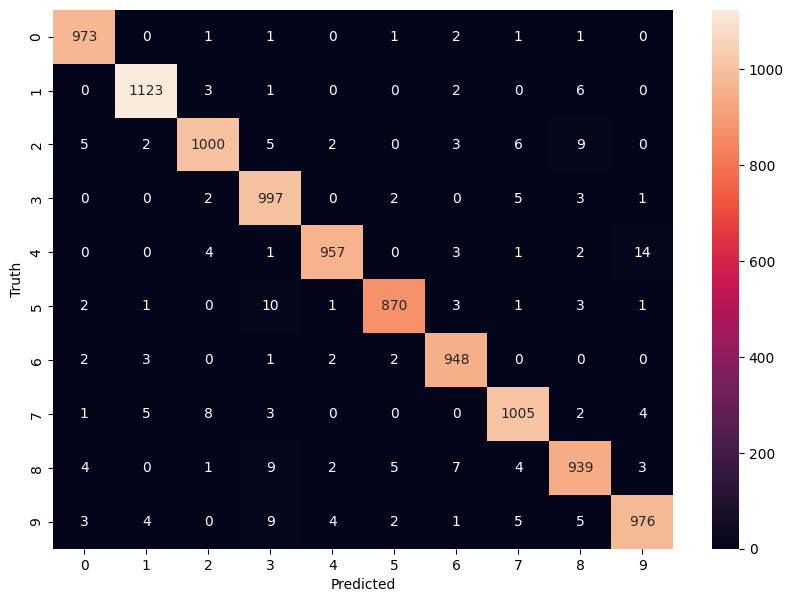

In [31]:
y_pred2 = model2.predict(X_test_flattened)
y_pred2_labels = np.argmax(y_pred2, axis=1)

cm2 = tf.math.confusion_matrix(
    labels=y_test,
    predictions=y_pred2_labels
)

plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
